3.1
582 609
The slack node(s) is/are  [571]


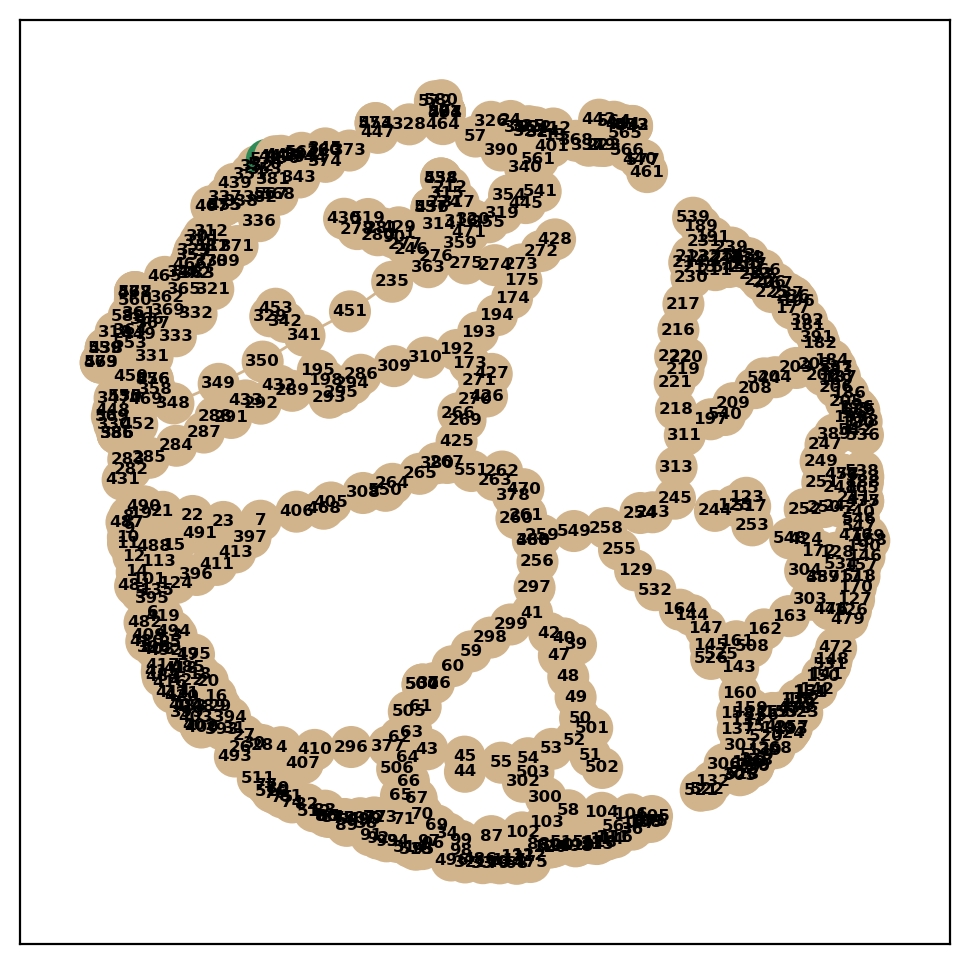

In [1]:
import networkx as nx
print(nx.__version__)
import matplotlib.pyplot as plt


import json
with open("GasLib-582/network.json", "r") as read_file:
    network_data = json.load(read_file)

slack_nodes = []


G = nx.Graph()
G.clear()

comp_list = ['pipes', 'short_pipes', 'compressors', 'valves', 'control_valves', 'resistors','loss_resistors']
for comp in comp_list:
    for id in network_data[comp]:
        G.add_edge(network_data[comp][id]['fr_node'], network_data[comp][id]['to_node'])
    
print(G.number_of_nodes(), G.number_of_edges())

for node_id in network_data['nodes']:
    if network_data['nodes'][node_id]['slack_bool'] == 1:
        slack_nodes.append(int(node_id))
    G.nodes[int(node_id)]["pos"] = (network_data['nodes'][node_id]['x_coord'], network_data['nodes'][node_id]['y_coord'])
print("The slack node(s) is/are ", [int(s) for s in slack_nodes])
slack_id = slack_nodes[0] #38, if multiple slacks, pick one of them 

pos = nx.get_node_attributes(G, "pos")
pos = nx.spring_layout(G, pos=pos, k=0.25, seed=10)

plt.figure(figsize=(6, 6), dpi=200)
color_list = ['seagreen' if node_name == slack_id else 'tan' for node_name in list(G.nodes)]
nx.draw_networkx(G, pos=pos, with_labels=True, node_size= 200, font_size=6, font_weight='bold', node_color=color_list, edge_color="tan")
plt.show()


In [2]:
# from networkx.algorithms.community.kernighan_lin import kernighan_lin_bisection
# out = kernighan_lin_bisection(G)
# for (v1, v2) in G.edges():
#     if (v1 in out[0]) and (v2 in out[1]):
#         print(v1, v2)
#     if (v2 in out[0]) and (v1 in out[1]):
#         print(v1, v2)
# print(len(out[0]), len(out[1]))

from networkx.algorithms.components import is_biconnected
print(is_biconnected(G))
#remember term block-cut tree

P = list(nx.articulation_points(G))
print(list(P))
def my_degree(n):
    return G.degree[n]

print(sorted(P, reverse=True,key=my_degree))



False
[359, 315, 314, 445, 319, 320, 277, 289, 291, 282, 285, 284, 287, 292, 198, 286, 295, 294, 309, 310, 192, 263, 378, 61, 64, 95, 96, 97, 100, 88, 102, 122, 32, 33, 68, 79, 110, 117, 120, 119, 118, 116, 111, 37, 36, 375, 109, 108, 106, 104, 58, 16, 25, 3, 9, 5, 11, 21, 405, 264, 15, 408, 420, 409, 415, 394, 26, 27, 410, 45, 40, 42, 50, 51, 52, 54, 99, 93, 94, 86, 75, 76, 77, 80, 81, 82, 83, 78, 38, 72, 73, 69, 70, 66, 63, 376, 164, 145, 147, 303, 247, 249, 251, 240, 547, 241, 188, 165, 248, 252, 250, 548, 179, 190, 146, 157, 518, 170, 126, 127, 171, 534, 172, 254, 237, 167, 166, 238, 239, 189, 191, 234, 233, 207, 225, 176, 178, 180, 185, 186, 187, 184, 182, 181, 177, 227, 229, 228, 232, 230, 211, 215, 217, 216, 222, 221, 218, 311, 199, 205, 206, 200, 202, 203, 204, 208, 209, 197, 313, 245, 125, 244, 304, 158, 132, 306, 307, 154, 141, 142, 149, 140, 279, 257, 133, 268, 290, 305, 130, 139, 138, 151, 148, 150, 152, 134, 136, 153, 156, 159, 160, 143, 161, 258, 549, 259, 261, 267, 425, 

In [2]:
max_degree_index = 1
for i in range(1, G.number_of_nodes()):
    if G.degree[i] > max_degree_index:
        max_degree_index = G.degree[i]
    else:
        continue
print(max_degree_index)

max_degree_nodes = []
for i in range(1, G.number_of_nodes()):
    if G.degree[i] == max_degree_index:
        max_degree_nodes.append(i)
    else:
        continue
print(max_degree_nodes)


8
[464]


In [8]:

interface_node_list = [549]

nbr_sets = []
for i in interface_node_list:
    nbr_sets.append( list(G.neighbors(i)) )
print(nbr_sets)

[[258, 259]]


In [9]:
for i in range(len(interface_node_list)):
    nbrs = nbr_sets[i]
    node = interface_node_list[i]
    print(node, nbrs)
    for i in nbrs:
        if (node, i) in G.edges():
            G.remove_edge(node, i) 
            
len_subnetworks_array = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print(len_subnetworks_array)

num_isolated_nodes = 0
for num in len_subnetworks_array:
    if num == 1:
        num_isolated_nodes += 1

if num_isolated_nodes != len(interface_node_list):
    print("Number of isolated node subnetworks is {}, expect/want {}".format(num_isolated_nodes, len(interface_node_list)))


549 [258, 259]
[405, 176, 1]


In [10]:
S = [G.subgraph(c).copy() for c in sorted(nx.connected_components(G), key=len, reverse=False)]
# remove first len(interface_node_list) subnetworks since they will be singleton interface nodes
S = S[len(interface_node_list):]
for SG in S:
    print(SG.nodes())
    

# # now knowing slack node is 38, put subnetwork with slack node as first one

for ni, SG in enumerate(S):
    if slack_id not in SG.nodes():
        print("Slack node {} NOT in subnetwork {}+1 ".format(slack_id, ni))
        continue
    else:
        print("Found slack node {} in subnetwork {}+1 ".format(slack_id, ni))
        
    if ni == 0:
        break 
        
    SG_temp = S[0]
    S[0] = SG
    S[ni] = SG_temp
    break
    
S_fig = []
for SG in S:
    print(SG.nodes())
    S_fig.append(SG.copy())

    


partition_dict = {}
for ni, SG in enumerate(S):
    for i in range(len(interface_node_list)):
        intf_node = interface_node_list[i]
        nbrs = nbr_sets[i]
        for node in nbrs:
            if node in SG.nodes():
                SG.add_edge(intf_node, node) 
    partition_dict[ni+1] = list(SG.nodes())
    print(partition_dict[ni+1])
    
S[0].nodes[549]

[517, 518, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 542, 543, 544, 545, 546, 547, 548, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 196, 197, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 255, 257, 258, 268, 279, 290, 303, 304, 305, 306, 307, 311, 313, 387, 389, 391, 392, 424, 435, 446, 457, 458, 459, 472, 473, 474, 476, 477, 478, 479, 508]
[464, 57, 378, 470, 27, 394, 361, 560, 14, 12, 396, 124, 71, 70, 11, 9, 8, 122, 120, 48, 47, 16, 489, 364, 553, 104, 58

{}

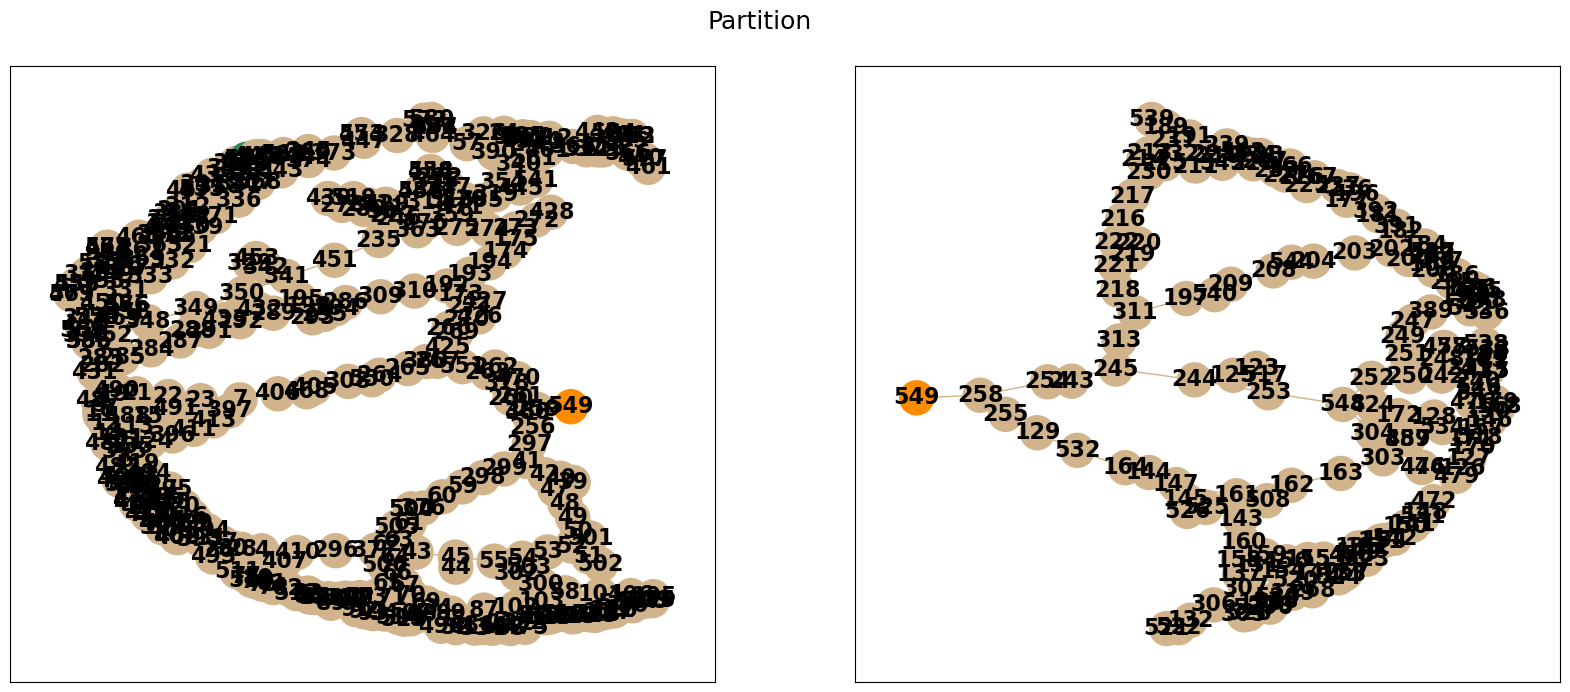

In [11]:
m = len(S)
plt.figure(figsize=(20, 8))
plt.subplots_adjust(hspace=0.25)
plt.suptitle("Partition", fontsize=18, y=0.95)
for ni, SG in enumerate(S):
    pos_dict = {}
    for i in SG.nodes():
        pos_dict[i]= pos[i]
    ax = plt.subplot(1, m, ni+1)
    color_list = ['darkorange' if node_name in interface_node_list else 'seagreen' if node_name == slack_id else 'tan' for node_name in list(SG.nodes)]
    nx.draw_networkx(SG, pos=pos_dict, with_labels=True, node_size= 600, font_size=16, font_weight='bold', node_color=color_list, edge_color="tan")



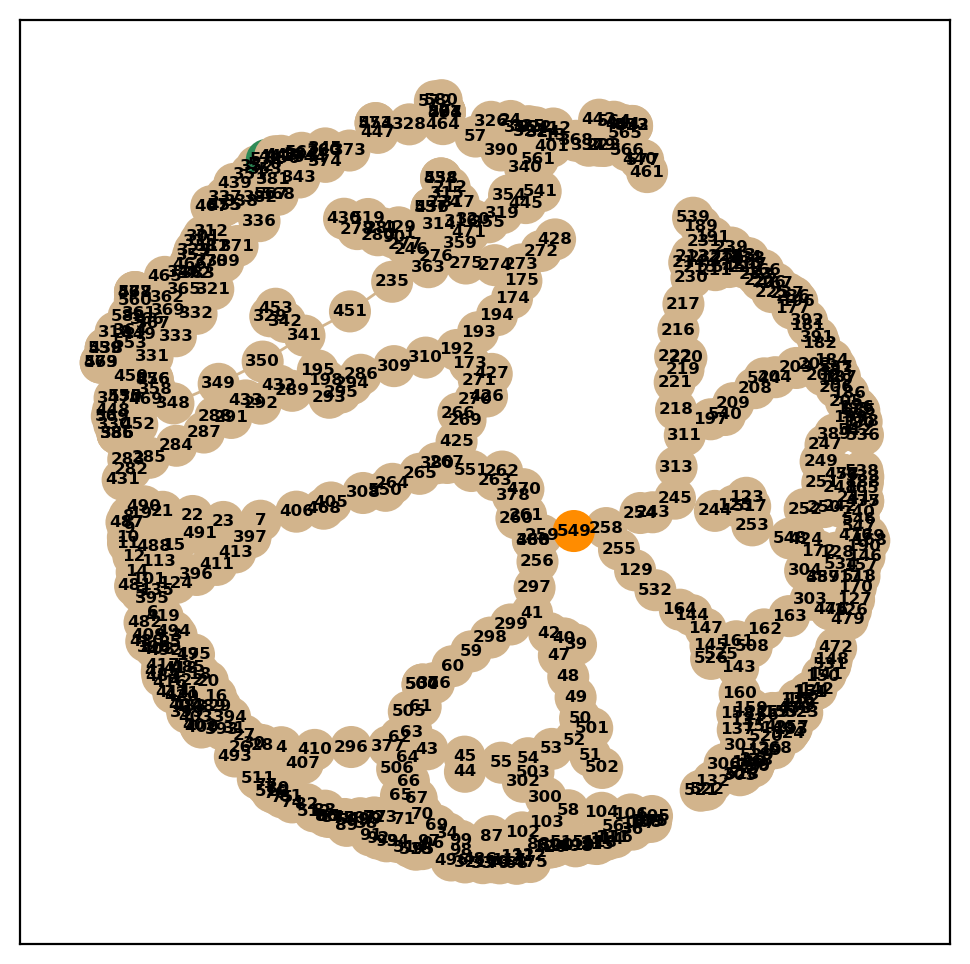

In [12]:


plt.figure(figsize=(6, 6), dpi=200)
color_list = ['darkorange' if node_name in interface_node_list else 'seagreen' if node_name == slack_id else 'tan' for node_name in list(G.nodes)]
nx.draw_networkx(G, pos=pos, with_labels=True, node_size= 200, font_size=6, font_weight='bold', node_color=color_list, edge_color="tan")
plt.show()

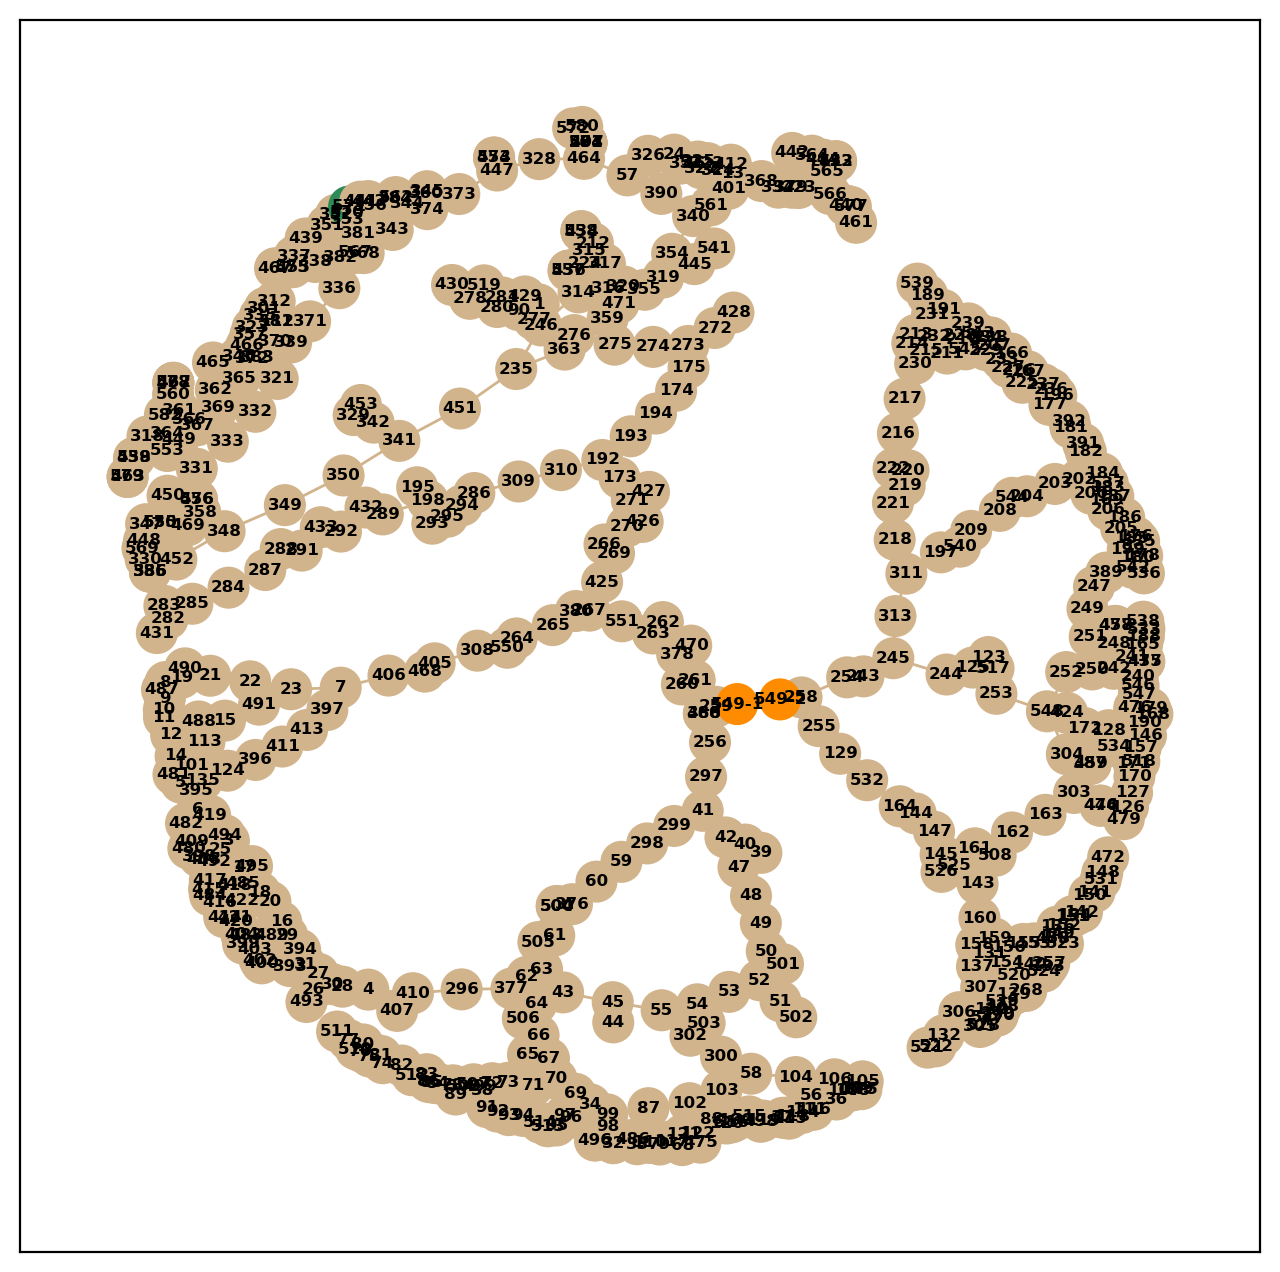

In [13]:


# for ni, SG in enumerate(S_fig):
#     for i in range(len(interface_node_list)):
#         intf_node = interface_node_list[i]
#         nbrs = nbr_sets[i]
#         for node in nbrs:
#             if node in SG.nodes():
#                 node_str = "{}-{}".format(intf_node, ni+1)
#                 SG.add_edge(node_str, node)
#                 SG.nodes[node_str]["pos"] = G.nodes[intf_node]["pos"]
#                 x_coord = []
#                 y_coord = []
#                 x_coord.append(pos[intf_node][0])
#                 y_coord.append(pos[intf_node][1])
#                 for node in list(SG.neighbors(node_str)):
#                     x_coord.append(pos[node][0])
#                     y_coord.append(pos[node][1])
#                 pos[node_str] = (sum(x_coord)/len(x_coord), sum(y_coord)/len(y_coord))

# For partition at [21, 27, 32] previous block does not work 
for ni, SG in enumerate(S_fig):
    for i in range(len(interface_node_list)):
        intf_node = interface_node_list[i]
        node_str1 = "{}-{}".format(intf_node, ni+1)
        nbrs = nbr_sets[i]
        for node in nbrs:
            if (intf_node, node) in S[ni].edges():
                if node in interface_node_list:
                    node_str2 = "{}-{}".format(node, ni+1)
                    SG.add_edge(node_str1, node_str2)
#                     SG.nodes[node_str1]["pos"] = G.nodes[intf_node]["pos"]
#                     SG.nodes[node_str2]["pos"] = G.nodes[node]["pos"]
#                     pos[node_str1] = pos[intf_node]
#                     pos[node_str2] = pos[node]
                else:
                    SG.add_edge(node_str1, node)
#                     SG.nodes[node_str1]["pos"] = G.nodes[intf_node]["pos"]
                x_coord = []
                y_coord = []
                x_coord.append(pos[intf_node][0])
                y_coord.append(pos[intf_node][1])
                for node in list(S[ni].neighbors(intf_node)):
                    x_coord.append(pos[node][0])
                    y_coord.append(pos[node][1])
                pos[node_str1] = (sum(x_coord)/len(x_coord), sum(y_coord)/len(y_coord))

                
                    
                
G_fig = nx.Graph()

for ni, SG in enumerate(S_fig):
    G_fig = nx.union(G_fig, SG)

plt.figure(figsize=(8, 8), dpi=200)
color_list = ['darkorange' if isinstance(node_name, str)   else 'seagreen' if node_name == slack_id else 'tan' for node_name in list(G_fig.nodes)]
nx.draw_networkx(G_fig, pos=pos, with_labels=True, node_size= 200, font_size=6, font_weight='bold', node_color=color_list, edge_color="tan")
plt.show()



add the edges netween interface nodes manually !


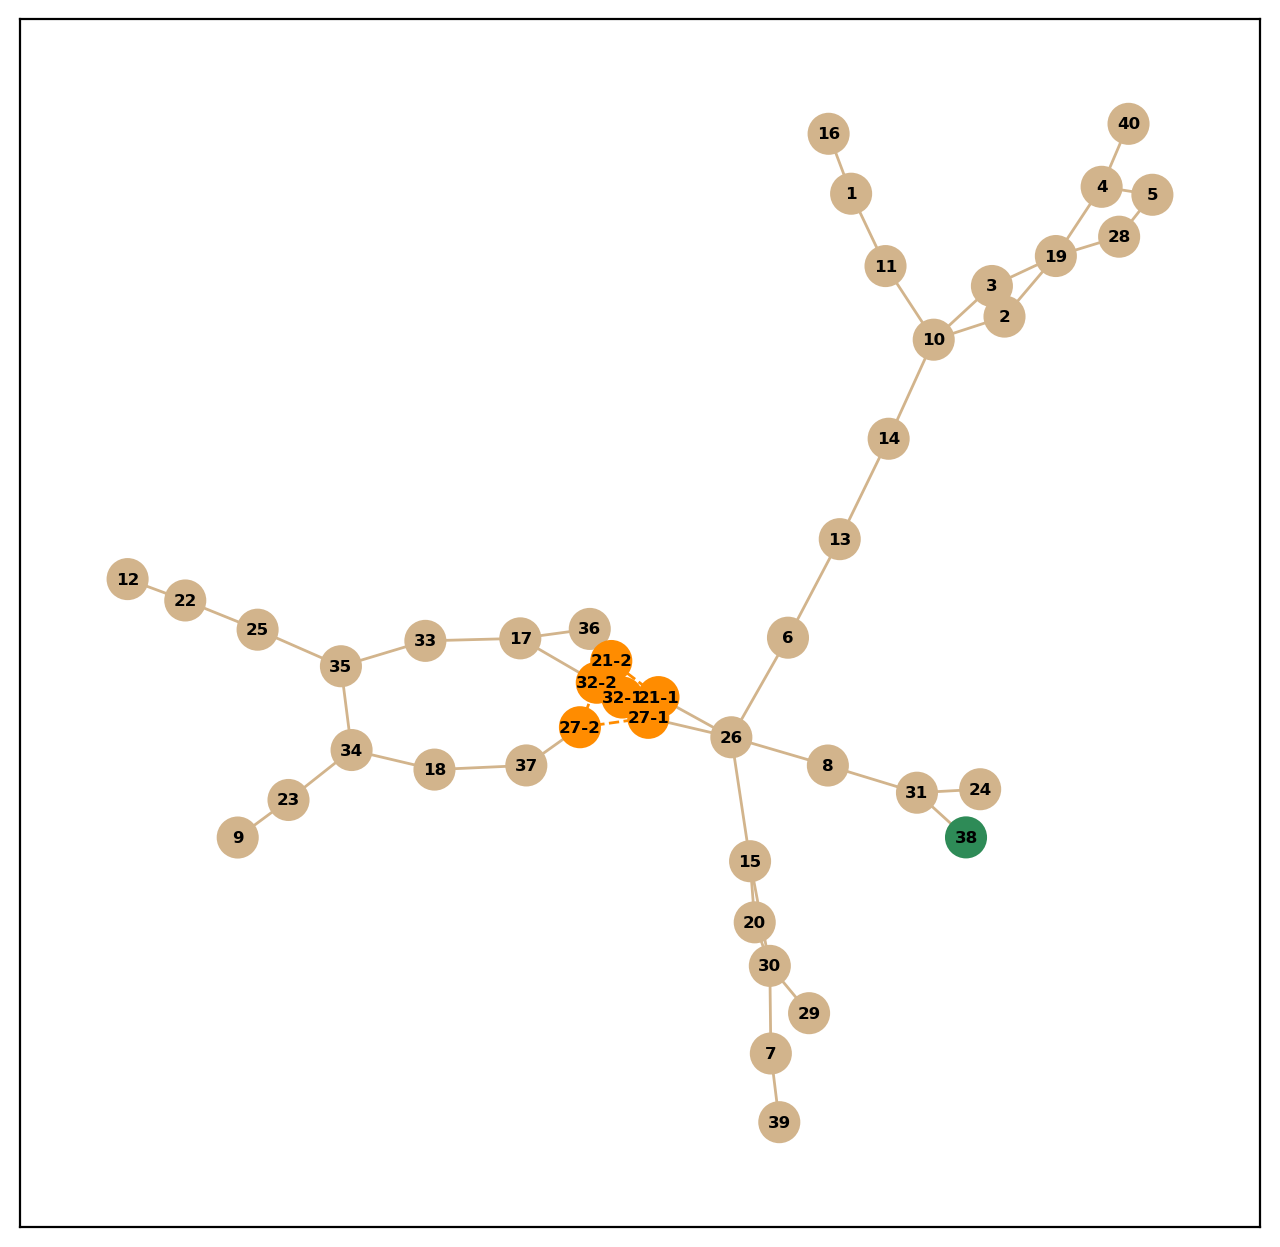

In [373]:
print("add the edges netween interface nodes manually !")
# G_fig.add_edges_from([("26-1", "26-2"), ("26-1", "26-3"), ("26-1", "26-4")])
# G_fig.add_edges_from([("26-1", "26-5"), ("26-1", "26-3"), ("26-1", "26-2"), ("14-2", "14-4")])
# G_fig.add_edges_from([("35-1", "35-4"), ("15-1", "15-2"), ("14-1", "14-3")])
# G_fig.add_edges_from([("26-1", "26-5"), ("26-1", "26-3"), ("26-1", "26-6"), ("14-3", "14-4"), ("19-2", "19-4")])
# G_fig.add_edges_from([("21-1", "21-2"), ("27-1", "27-2")])
# G_fig.add_edges_from([("33-1", "33-2"), ("18-1", "18-2")])
# G_fig.add_edges_from([("2-1", "2-2"), ("3-1", "3-2")])
G_fig.add_edges_from([("21-1", "21-2"), ("27-1", "27-2"), ("32-1", "32-2")])






plt.figure(figsize=(8, 8), dpi=200)
color_list = ['darkorange' if isinstance(node_name, str)   else 'seagreen' if node_name == slack_id else 'tan' for node_name in list(G_fig.nodes)]
nx.draw_networkx_nodes(G_fig, pos=pos,  node_size= 200, node_color=color_list)
edge_list1 =[]
edge_list2 = []
for edge in list(G_fig.edges):
    if isinstance(edge[0], str) and isinstance(edge[1], str):
        edge_list1.append(edge)
    else:
        edge_list2.append(edge)
        
nx.draw_networkx_edges(G_fig, pos=pos, edgelist = edge_list1, style="--", edge_color= "darkorange")
nx.draw_networkx_edges(G_fig, pos=pos, edgelist = edge_list2, edge_color="tan")
nx.draw_networkx_labels(G_fig, pos=pos,  font_size=6, font_weight='bold')
plt.show()


In [247]:
save_data = False
 
if save_data:
    print("Writing to json...")
    with open("GasLib-40-split/partition8.json", "w") as outfile:
        json.dump(partition_dict, outfile)
    print("Completed writing to json...")
else:
    print("Flag is set to false, not writing")

Flag is set to false, not writing
